# Project_3: Linear Regressions
## Author: Wing Yan Sang
## Date: 11/5/2017

<p><a name="sections"></a></p>


## Sections

- <a href="#ordinals">EDA of ordinals/numeric</a><br>
- <a href="#linear1">Linear Regression 1</a><br>
- <a href="#categorical">EDA of Categoricals</a><br>
- <a href="#categorica_engineering">Features Engineering of Select Categoricals</a><br>
- <a href="#linear2">Linear Regression 2</a><br>
- <a href="#VIF1">VIF Analysis of Linear Regression 2 Model</a><br>
- <a href="#linear3">Linear Regression 3</a><br>
- <a href="#linear4">Linear Regression 4</a><br>
- <a href="#linear5">Linear Regression 5: All 20 Variables</a><br>
 - <a href="#dummify1">Dummify Categorical Variables</a><br>
 - <a href="#standardization">Standardize Numeric Variables</a><br>
 - <a href="#VIF2">VIF of All 20 Variables</a><br>
 - <a href="#linear_5">Run Regression</a><br>
 - <a href="#residuals_lin5">Residuals/Influence Analysis</a><br>

In [572]:
#### Loading the packages to be used
from __future__ import print_function 
import pandas as pd
import numpy as np
from scipy import stats

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm
from  statsmodels.genmod import generalized_linear_model

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import seaborn as sns

In [573]:
#read in csv file and create data frame
train_sub = pd.read_csv("train_sub.csv")
train_sub = pd.DataFrame(train_sub)
pd.set_option('display.max_columns', None)
train_sub.head()

#drop columns: "X1stFlrSF, X2ndFlrSF, GarageQual, GarageCond, PavedDrive
train_sub = train_sub.drop(["X1stFlrSF", "X2ndFlrSF", "GarageQual", "GarageCond", "PavedDrive"], 1)
train_sub.head()


,MSZoning,Neighborhood,HouseStyle,OverallQual,YearBuilt,ExterQual,Foundation,BsmtQual,GrLivArea,FullBath,TotRmsAbvGrd,GarageFinish,GarageCars,GarageArea,SaleType,SaleCondition,SalePrice
0,RL,CollgCr,2Story,7,2003,Gd,PConc,Gd,1710,2,8,RFn,2,548,WD,Normal,208500.0
1,RL,Veenker,1Story,6,1976,TA,CBlock,Gd,1262,2,6,RFn,2,460,WD,Normal,181500.0
2,RL,CollgCr,2Story,7,2001,Gd,PConc,Gd,1786,2,6,RFn,2,608,WD,Normal,223500.0
3,RL,Crawfor,2Story,7,1915,TA,BrkTil,TA,1717,1,7,Unf,3,642,WD,Abnorml,140000.0
4,RL,NoRidge,2Story,8,2000,Gd,PConc,Gd,2198,2,9,RFn,3,836,WD,Normal,250000.0


In [574]:
#split into numeric and categorical features and observed values
X_num = train_sub[["GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea"]]
X_cat = train_sub.drop(["GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea", "SalePrice"],1)
y = train_sub[["SalePrice"]]


,SalePrice
0,12.247699
1,12.109016
2,12.317171
3,11.849405
4,12.429220
5,11.870607
6,12.634606
7,12.206078
8,11.774528
9,11.678448


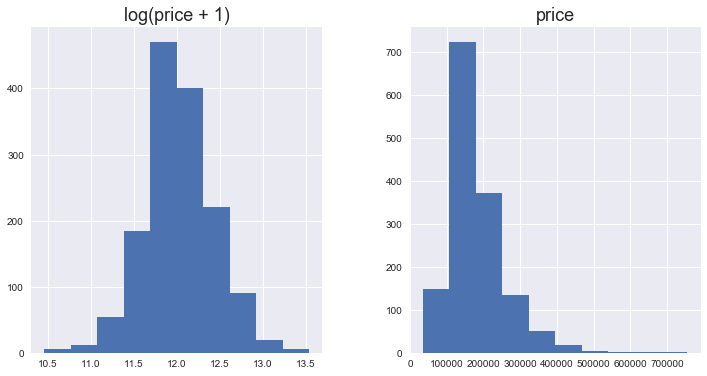

In [575]:
#Inspect distribution of sales prices. Seems that log transformation can make the sales price more "normal".

mpl.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":y["SalePrice"], "log(price + 1)":np.log1p(y["SalePrice"])})
prices.hist()

#log transform the target:
y = np.log1p(y)
y

<p><a name="ordinals"></a></p>

## EDA of Numeric/Ordinals Variables

EDA of the following Numeric Variables: "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea"

In [576]:
#inspect summary of numeric variables
X_num.describe()

,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,1.565068,6.517808,1.767123,472.980137
std,525.480383,0.550916,1.625393,0.747315,213.804841
min,334.000000,0.000000,2.000000,0.000000,0.000000
25%,1129.500000,1.000000,5.000000,1.000000,334.500000
50%,1464.000000,2.000000,6.000000,2.000000,480.000000
75%,1776.750000,2.000000,7.000000,2.000000,576.000000
max,5642.000000,3.000000,14.000000,4.000000,1418.000000


/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


0.46899747732296548

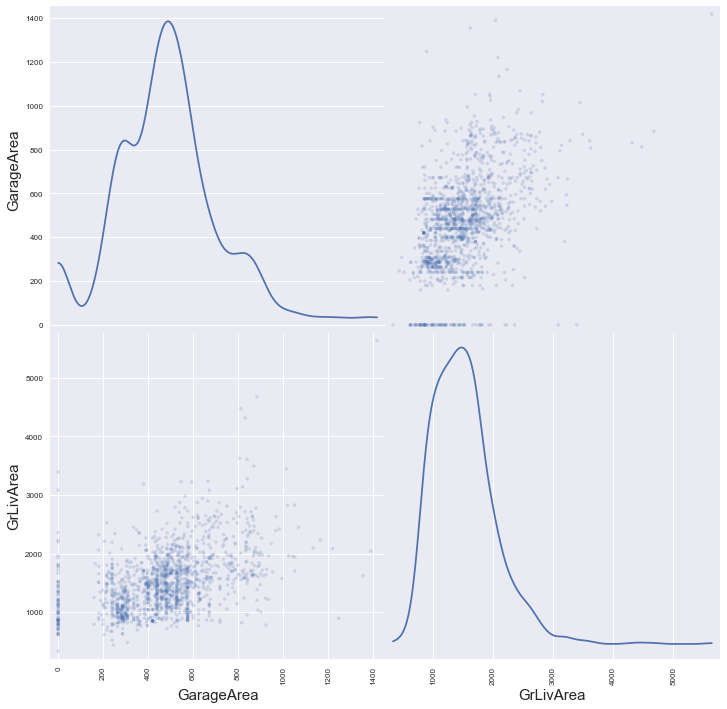

In [577]:
#Check for multicollinearity between GarageArea and GrLivArea. Scatter shows vague linear relationship. 
#Correlation is 0.46899

from pandas.tools.plotting import scatter_matrix
scatter_matrix(X_num[["GarageArea","GrLivArea"]], alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.savefig('num_scatter.png')
np.corrcoef(X_num["GarageArea"], X_num["GrLivArea"])[0, 1]

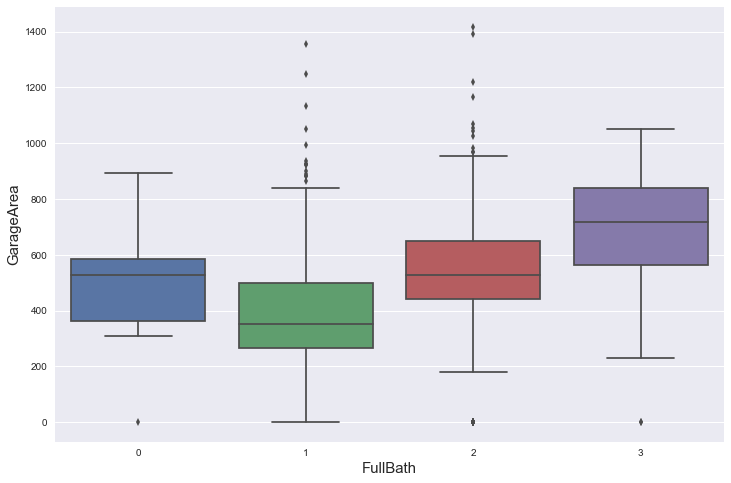

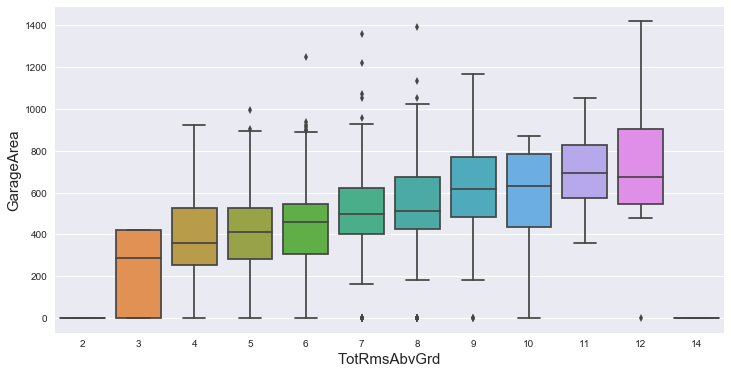

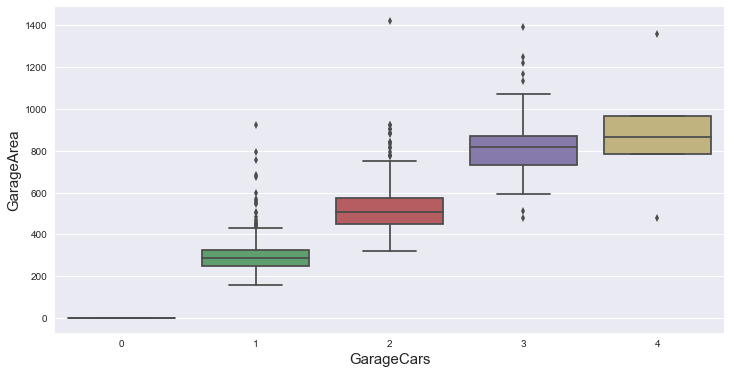

In [578]:
#check for multicollinearity between GarageArea with other variables (except GrLivarea) using boxplots.
#There does seem to be a linear relationship between Garage Area and these other variables.
#All seem pretty strong.
fig = plt.figure(figsize=(12, 8))
for i in range(1,4):
    sns.boxplot(y=X_num["GarageArea"], x=X_num.iloc[:,i])
    plt.show()

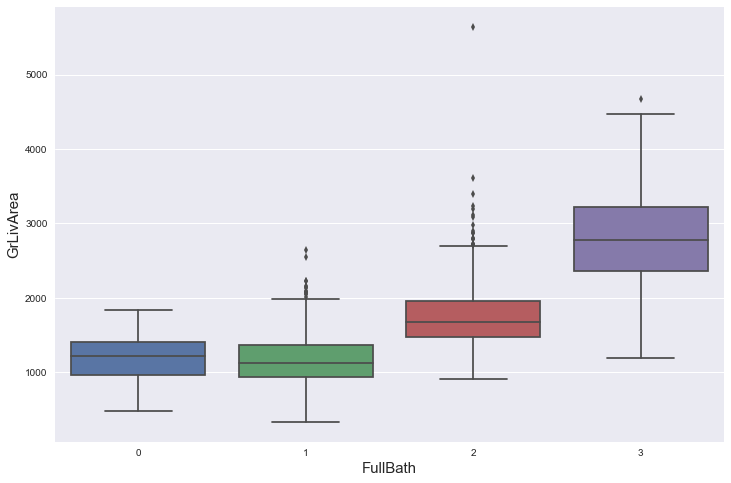

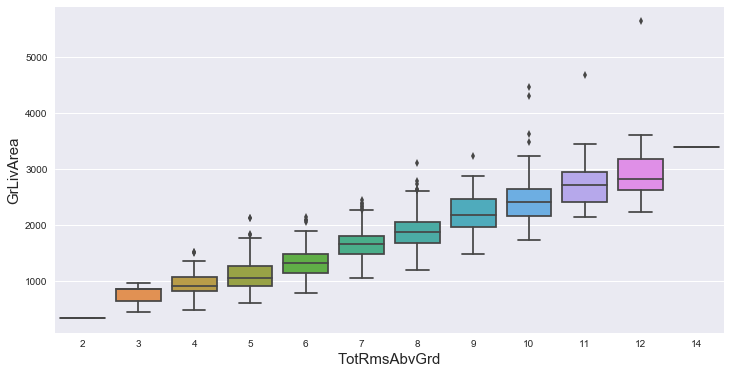

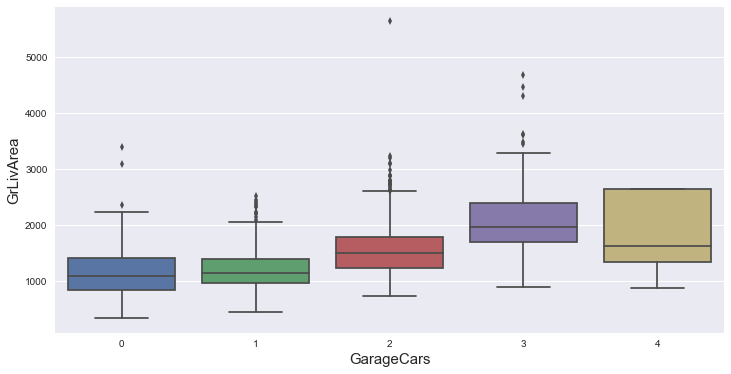

In [579]:
#check for multicollinearity between GrLivArea with other variables (except GrLivarea) using boxplots.
#There does seem to be a linear relationship between GrLiv Area and these other variables.
#TotRms and Full Bath are strongest.

fig = plt.figure(figsize=(12, 8))
for i in range(1,4):
    sns.boxplot(y=X_num["GrLivArea"], x=X_num.iloc[:,i])
    plt.show()

<p><a name="linear1"></a></p>
## Linear Regression 1

First linear regression with the following variables: "GrLivArea", "GarageCars", "GarageArea"

In [580]:
#Split into training and test sets

X = X_num[["GrLivArea", "GarageCars","GarageArea"]]

try:  # train_test_split was moved in 0.18.0
    from sklearn.model_selection import train_test_split
except:  # Following import works through 0.19 but outputs a warning in 0.18
    from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [581]:
#Run linear model with just GrLivArea, GarageCars, GrLivArea
#RMSE goes up for test set. May have overfitted the model. Also the RMSE and R^2 results are not that good.
from sklearn.metrics import mean_squared_error
from math import sqrt

ols = linear_model.LinearRegression()

ols.fit(X_train, y_train)

y_predicted_train = ols.predict(X_train)
mse_train = mean_squared_error(y_train, y_predicted_train)
rms_train = sqrt(mean_squared_error(y_train, y_predicted_train))

y_predicted_test = ols.predict(X_test)
mse_test = mean_squared_error(y_test, y_predicted_test)
rms_test = sqrt(mean_squared_error(y_test, y_predicted_test))

print("Root mean squared error for train set: %f" %rms_train)
print("R^2 for train set: %f" %ols.score(X_train, y_train))

print("*"*50)

print("Root mean squared error for test set: %f" %rms_test)
print("R^2 for test  set: %f" %ols.score(X_test, y_test))

colnames = X_train.columns
result = pd.DataFrame(ols.coef_)
result.columns = colnames.tolist()
result['intercept'] = ols.intercept_ 
result = result.transpose()
result.columns = ['coefficient']
result




Root mean squared error for train set: 0.234625
R^2 for train set: 0.662624
**************************************************
Root mean squared error for test set: 0.237823
R^2 for test  set: 0.601476


,coefficient
GrLivArea,0.000375
GarageCars,0.202718
GarageArea,0.000180
intercept,11.012599


In [582]:
#Performing same analysis as above using Statsmodel
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     762.1
Date:                Tue, 07 Nov 2017   Prob (F-statistic):          5.11e-274
Time:                        07:35:35   Log-Likelihood:                 36.007
No. Observations:                1168   AIC:                            -64.01
Df Residuals:                    1164   BIC:                            -43.76
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0126      0.022    494.314      0.0

In [583]:
X_test = sm.add_constant(X_test)
y_predicted_test = results.predict(X_test)

mse_test = mean_squared_error(y_test, y_predicted_test)
rms_test = sqrt(mean_squared_error(y_test, y_predicted_test))
print("Root mean squared error for test set: %f" %rms_test)


Root mean squared error for test set: 0.237823


<p><a name="categorical"></a></p>

## EDA of Categorical Variables

EDA of categorical variables to examine relationship with SalePrice and with each other. 


In [584]:
#View the Categorical Variables
X_cat.head()

,MSZoning,Neighborhood,HouseStyle,OverallQual,YearBuilt,ExterQual,Foundation,BsmtQual,GarageFinish,SaleType,SaleCondition
0,RL,CollgCr,2Story,7,2003,Gd,PConc,Gd,RFn,WD,Normal
1,RL,Veenker,1Story,6,1976,TA,CBlock,Gd,RFn,WD,Normal
2,RL,CollgCr,2Story,7,2001,Gd,PConc,Gd,RFn,WD,Normal
3,RL,Crawfor,2Story,7,1915,TA,BrkTil,TA,Unf,WD,Abnorml
4,RL,NoRidge,2Story,8,2000,Gd,PConc,Gd,RFn,WD,Normal


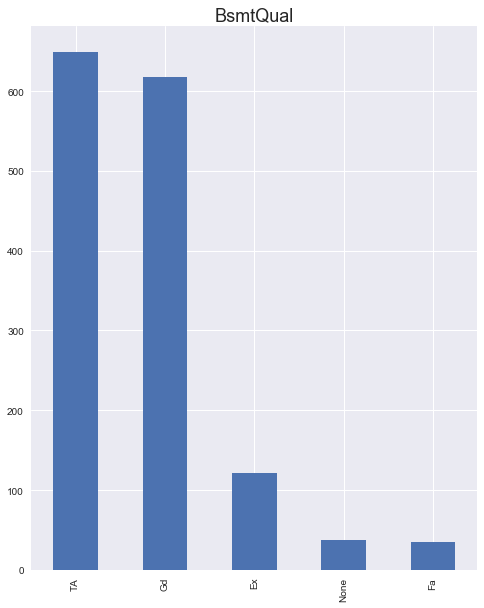

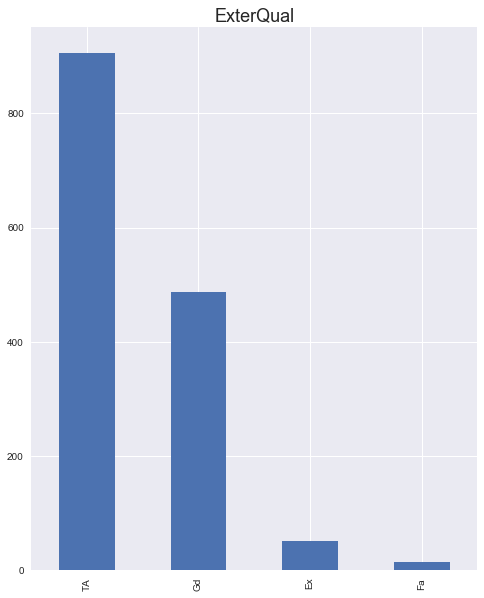

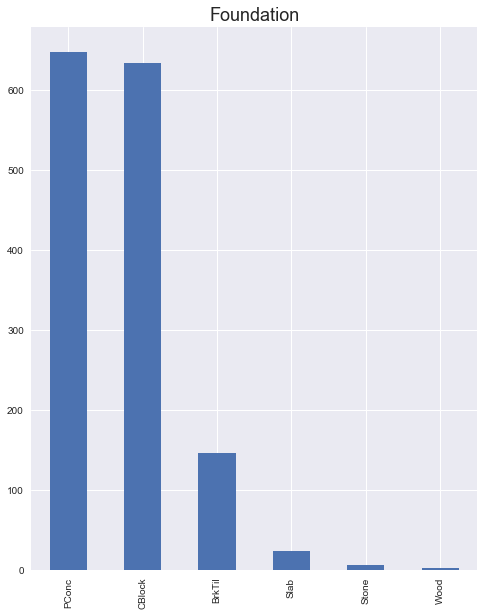

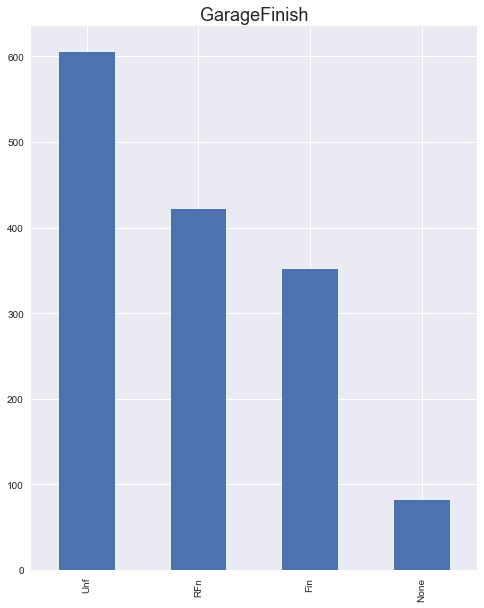

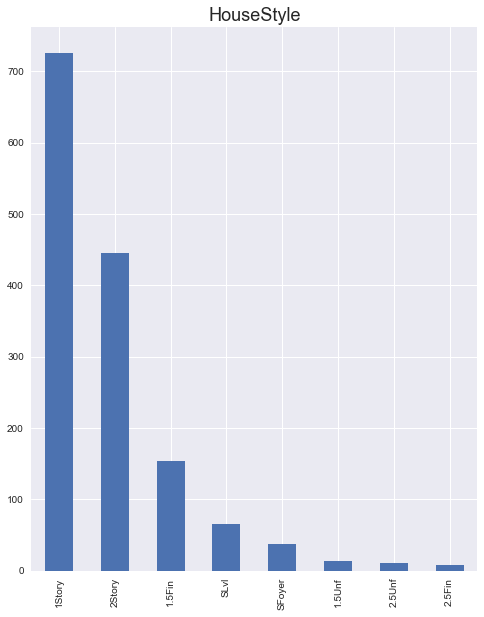

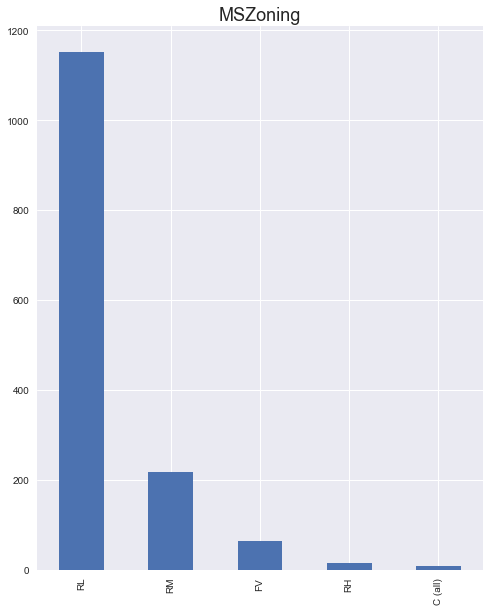

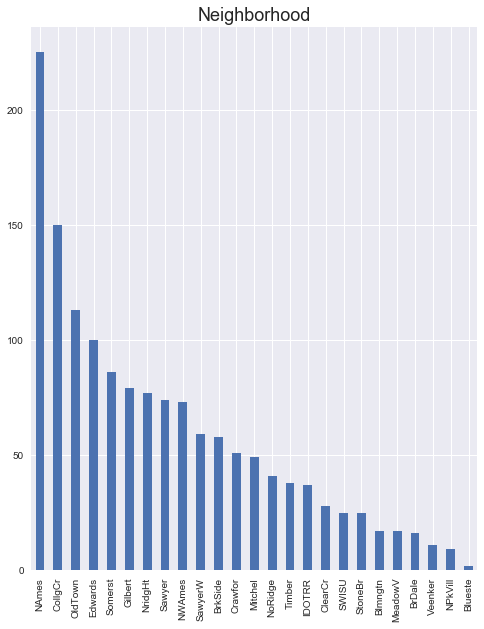

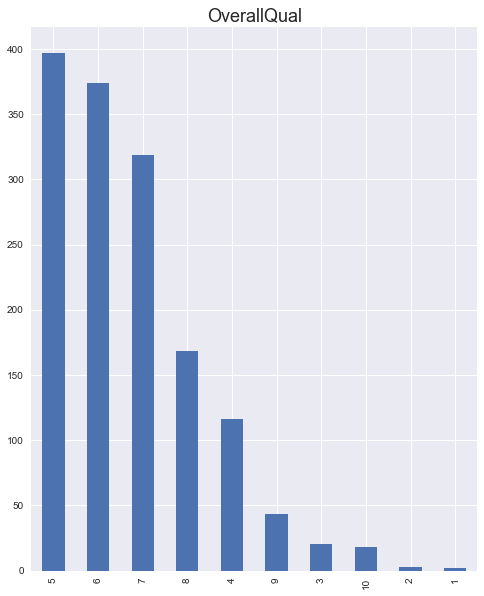

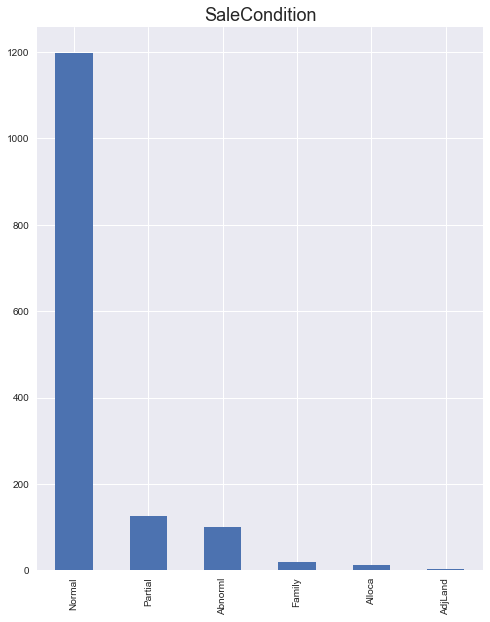

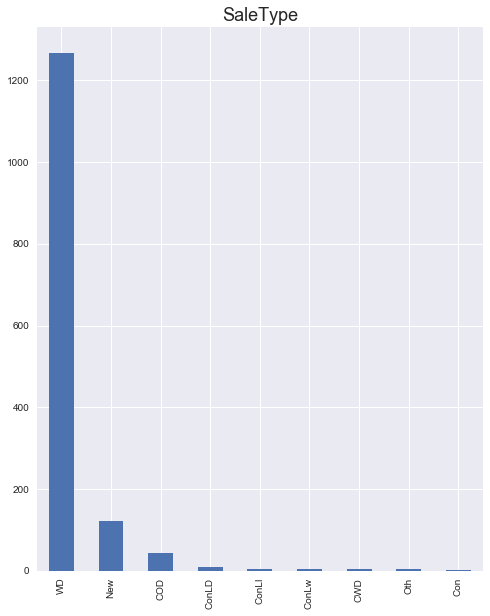

(array([   2.,    4.,    3.,    2.,    3.,    1.,   11.,    4.,   22.,
          26.,   54.,   42.,   26.,   22.,   35.,   23.,   58.,   47.,
         100.,   66.,   95.,   94.,   83.,   46.,   23.,   34.,   82.,
          88.,  206.,  158.]),
 array([ 1872. ,  1876.6,  1881.2,  1885.8,  1890.4,  1895. ,  1899.6,
         1904.2,  1908.8,  1913.4,  1918. ,  1922.6,  1927.2,  1931.8,
         1936.4,  1941. ,  1945.6,  1950.2,  1954.8,  1959.4,  1964. ,
         1968.6,  1973.2,  1977.8,  1982.4,  1987. ,  1991.6,  1996.2,
         2000.8,  2005.4,  2010. ]),
 <a list of 30 Patch objects>)

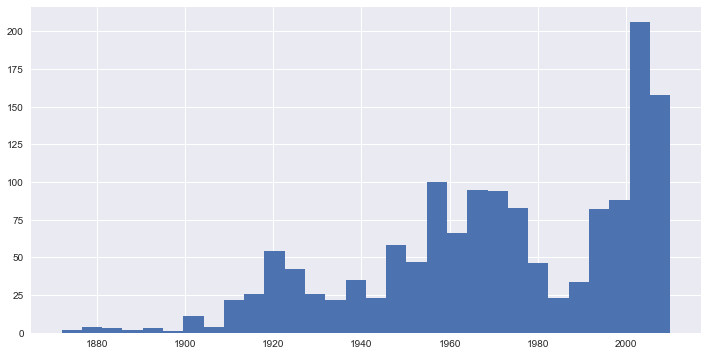

In [585]:
#Bar charts of the categorical variables
#For quality variables, the middle value (typical) dominates, then the second is good.
#GarageFinish is dominated by Unfinished and Rough Finish
#HouseStyle can be broken up into >=2Flr, <=1 1Flr, SplitLevel
#MSZoning dominated by Residential(Low and Medium Density)
#Will need to do further analysis on Neighborhood to see if it values can be combined.
#Sale Type/SaleCondition dominated by Warranty Deed and Normal
#Many homes built after 1990

for idx, col in zip(range(1, len(X_cat.columns)),X_cat.columns.sort_values()): 
    plt.figure(figsize=(8, 10)) 
    X_cat[col].value_counts().plot(kind='bar', )
    plt.title(col) 
    plt.show()
    
plt.hist(X_cat["YearBuilt"], bins=30) 
    


<p><a name="categorical_engineering"></a></p>

## EDA and Features Engineering of Select Categorical Variables

EDA and features engineering of the following categorical variables:
"Neighborhood", "OverallQual", "HouseStyle", "SaleCondition".


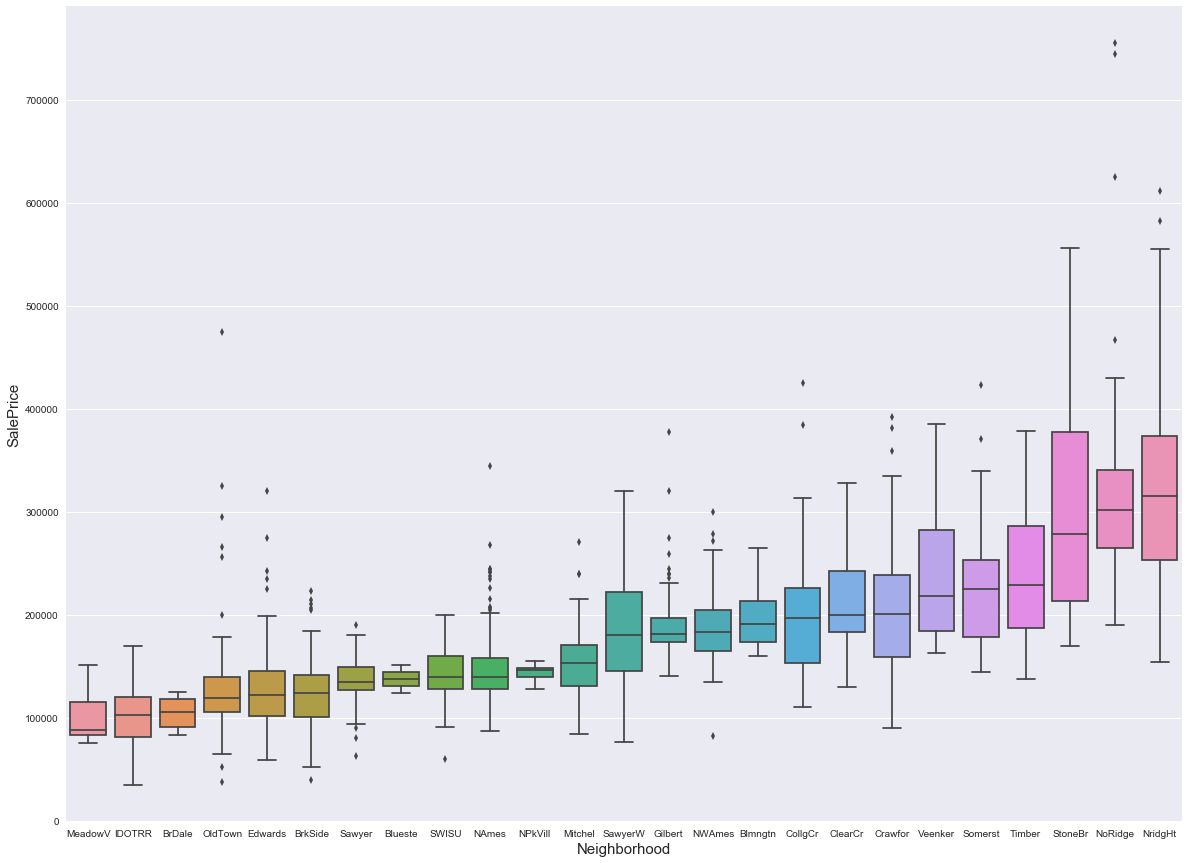

In [586]:
#Boxplot of sales price by neighborhood. 
#Seems like there are big ranges for neighborhoods at the top end of the market whereas ranges are smaller 
#at bottom neighborhoods. Also there are quite a few outliers. May have to remove them to prevent overfitting.

m = train_sub.groupby(['Neighborhood'])['SalePrice'].apply(np.median)
m.name = 'MEDIAN'
m = m.sort_values()
m.index


fig = plt.figure(figsize=(20, 15))
sns.boxplot(y=train_sub["SalePrice"], x=train_sub["Neighborhood"], order = m.index)

In [587]:
#Examine quartile ranges and group them
pd.qcut(m, 4)
x = pd.DataFrame(pd.qcut(m, 4))
x.columns.values[0] = "quartiles"
s = [i for i in range(1,5) for _ in range(6)]
s.insert(0,1)
x["Group"] = s
x.columns.values[1] = "Neigh_Group"
x['Neighborhood'] = x.index.tolist()

In [588]:
#Add Neigh_Group column to train_sub data frame. Count the frequency of each group. 
#Lower value homes most frequent. Higher valued homes least frequent.

new_df = pd.merge(train_sub, x, how='left', on = ["Neighborhood", "Neighborhood"])
new_df = new_df.drop("quartiles",1)
train_sub = new_df
train_sub.groupby("Neigh_Group").size()


Neigh_Group
1    415
2    369
3    398
4    278
dtype: int64

In [589]:
#Group HouseStyle variable by 1stFloor, 2ndFloor, and Split and count frequency. 1Story and 2Story close.

def hstyle(c):
    if c['HouseStyle'] == "1Story":
        return '1Story'
    elif c['HouseStyle'] in ["SFoyer", "SLvl"]:
        return 'Split'
    else:
        return '2Story'

train_sub['House_Group'] = train_sub.apply(hstyle, axis=1)
train_sub.groupby("House_Group").size()

House_Group
1Story    726
2Story    632
Split     102
dtype: int64

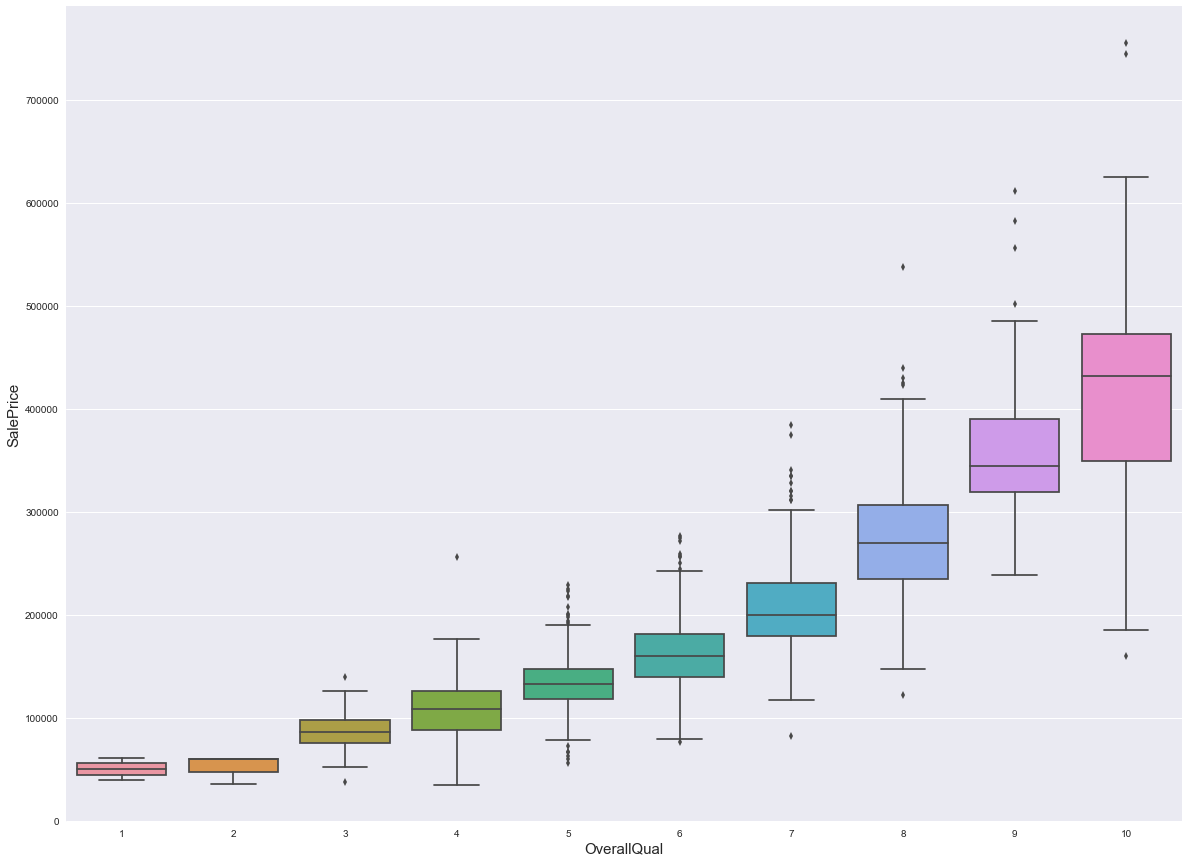

In [590]:
#Boxplot of sales price by OverallQual. As quality goes up, sales price goes up.
#Similar to Neighborhood analysis, there are bigger ranges the higher the quality. 
#Also there are quite a few outliers towards right side of chart.

n = train_sub.groupby(['OverallQual'])['SalePrice'].apply(np.median)
n.name = 'MEDIAN'
n = n.sort_values()
n.index


fig = plt.figure(figsize=(20, 15))
sns.boxplot(y=train_sub["SalePrice"], x=train_sub["OverallQual"], order = n.index)

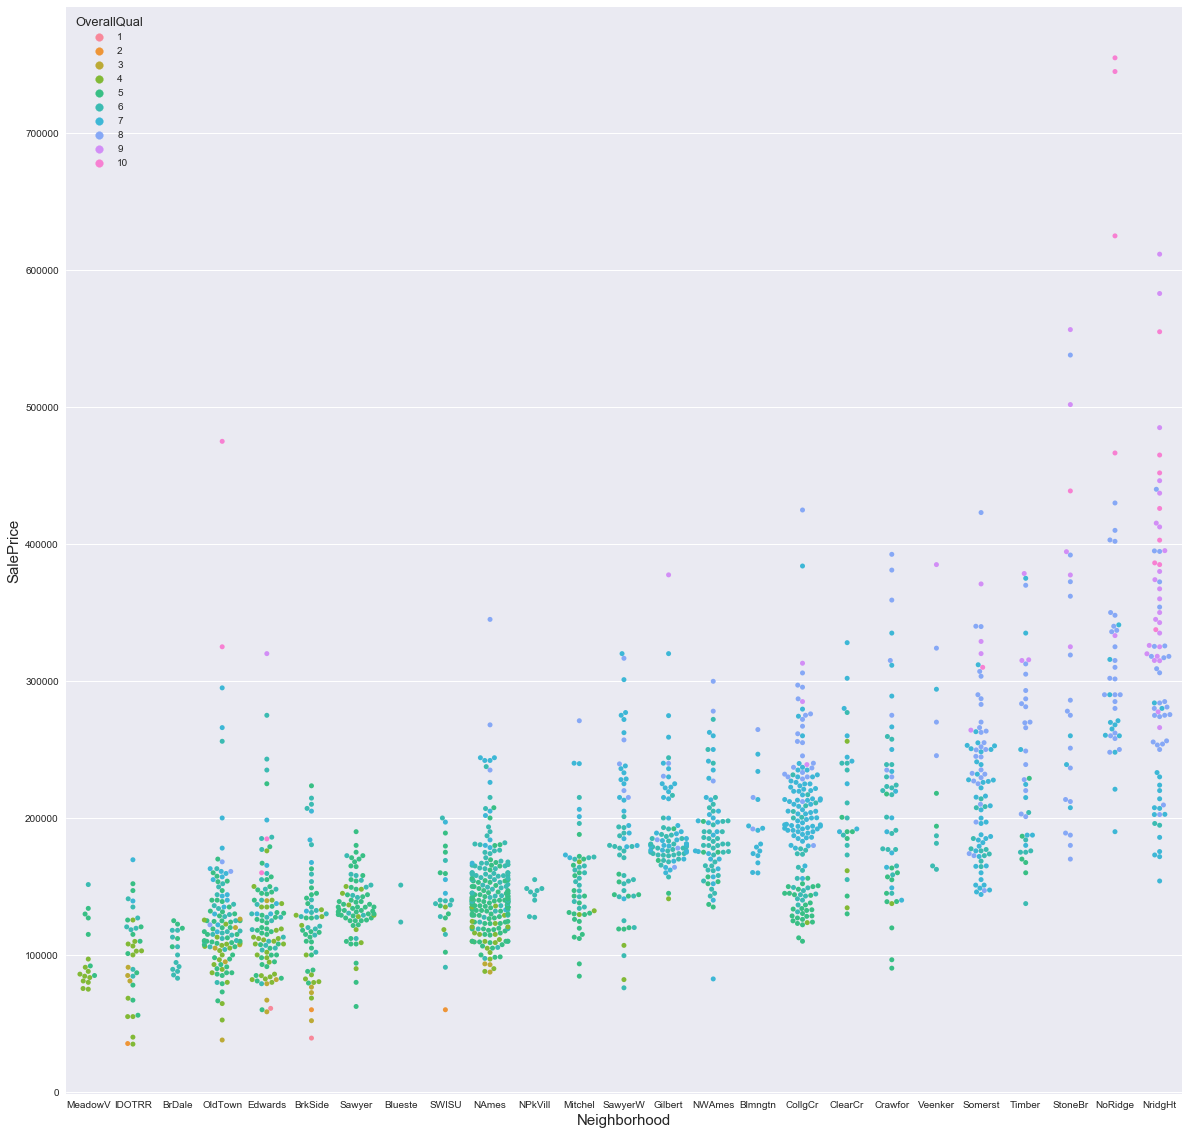

In [591]:
#Examine relationship between Neighborhood, OverallQual, and SalePrice. Lower quality (olive green, green) 
#corresponds to lower price and certain neigborhoods. Same for higher quality homes (violet, pinkish, light blue).

plt.figure(figsize=(20,20))
sns.swarmplot(x = 'Neighborhood', y = 'SalePrice', data=train_sub, hue='OverallQual',order = m.index)


In [592]:
#Crosstab also shows some relationship between the Neigh_Group and OverallQual

pd.crosstab(train_sub["Neigh_Group"], train_sub["OverallQual"])


OverallQual,1,2,3,4,5,6,7,8,9,10
Neigh_Group,,,,,,,,,,
1,2,2,17,83,182,94,27,3,1,4
2,0,1,3,27,152,135,42,9,0,0
3,0,0,0,6,56,122,169,41,4,0
4,0,0,0,0,7,23,81,115,38,14


In [593]:
#Examine the quantiles of OverallQual
qual_cut = pd.DataFrame(pd.qcut(n, 3))
qual_cut

,MEDIAN
OverallQual,
1,"(50149.999, 108000.0]"
2,"(50149.999, 108000.0]"
3,"(50149.999, 108000.0]"
4,"(50149.999, 108000.0]"
5,"(108000.0, 200141.0]"
6,"(108000.0, 200141.0]"
7,"(108000.0, 200141.0]"
8,"(200141.0, 432390.0]"
9,"(200141.0, 432390.0]"


In [594]:
#Add column that groups OverallQual into thirds

def overall_qual(c):
    if c['OverallQual'] <= 4:
        return 'Low'
    elif c['OverallQual'] > 7:
        return 'High'
    else:
        return 'Medium'

train_sub['Qual_Group'] = train_sub.apply(overall_qual, axis=1)
train_sub.groupby("Qual_Group").size()

Qual_Group
High       229
Low        141
Medium    1090
dtype: int64

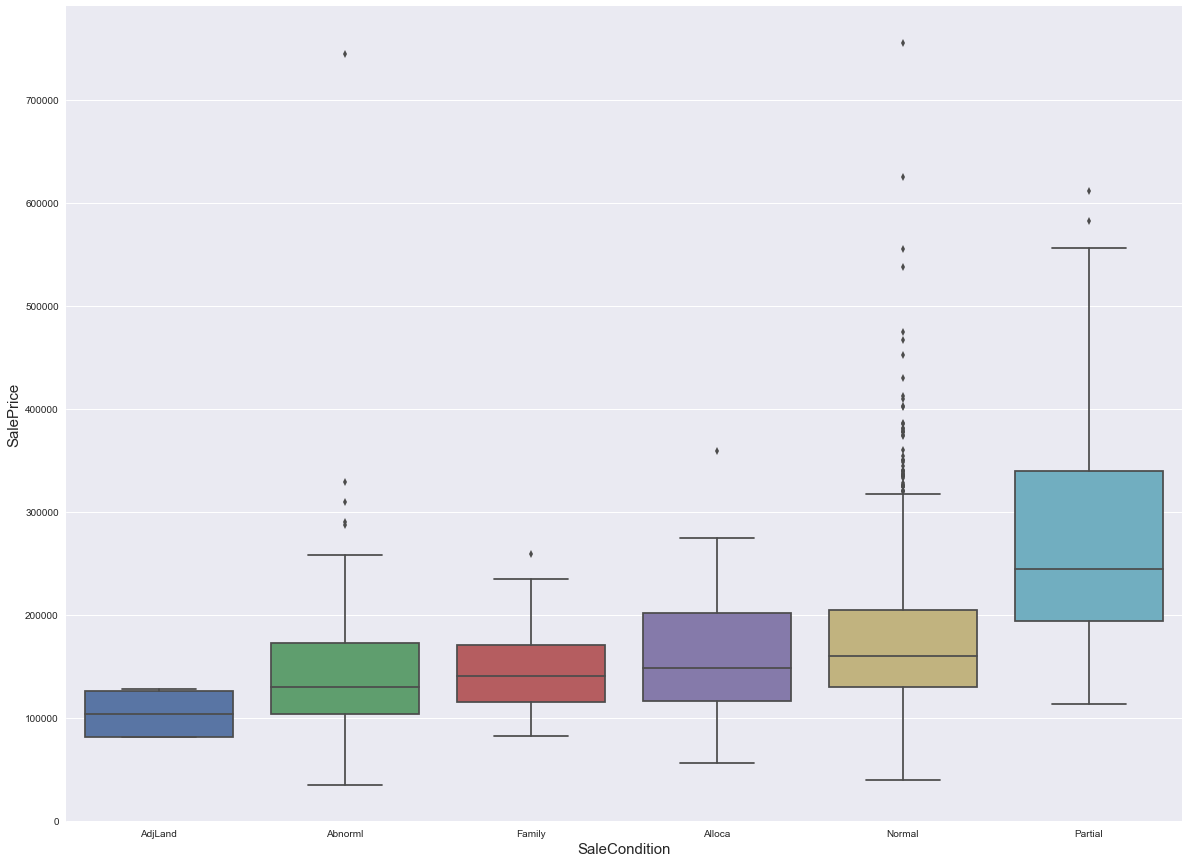

In [595]:
#Boxplot of sales price by SaleCondition. 

n2 = train_sub.groupby(['SaleCondition'])['SalePrice'].apply(np.median)
n2.name = 'MEDIAN'
n2 = n2.sort_values()
n2.index


fig = plt.figure(figsize=(20, 15))
sns.boxplot(y=train_sub["SalePrice"], x=train_sub["SaleCondition"], order = n2.index)

In [596]:
#Examine the quantiles of OverallQual
pd.qcut(n2, 3)

SaleCondition
AdjLand    (103999.999, 137000.0]
Abnorml    (103999.999, 137000.0]
Family     (137000.0, 152096.667]
Alloca     (137000.0, 152096.667]
Normal     (152096.667, 244600.0]
Partial    (152096.667, 244600.0]
Name: MEDIAN, dtype: category
Categories (3, interval[float64]): [(103999.999, 137000.0] < (137000.0, 152096.667] < (152096.667, 244600.0]]

In [597]:
#Add column that groups SaleCondition into thirds

def saleCond(c):
    if c['SaleCondition'] == "Partial":
        return 'Partial'
    else:
        return 'Non_partial'

train_sub['SaleCond_Group'] = train_sub.apply(saleCond, axis=1)
train_sub.groupby("SaleCond_Group").size()

SaleCond_Group
Non_partial    1335
Partial         125
dtype: int64

In [598]:
#dummify Neigh_Group
df = train_sub.copy()
hood = pd.get_dummies(df['Neigh_Group'], prefix='Neigh', prefix_sep='__')
hood = hood.drop('Neigh__1', axis=1)
hood.head()
df = pd.concat([df.drop('Neigh_Group', axis=1), hood], axis=1)



In [599]:
df.head()

,MSZoning,Neighborhood,HouseStyle,OverallQual,YearBuilt,ExterQual,Foundation,BsmtQual,GrLivArea,FullBath,TotRmsAbvGrd,GarageFinish,GarageCars,GarageArea,SaleType,SaleCondition,SalePrice,House_Group,Qual_Group,SaleCond_Group,Neigh__2,Neigh__3,Neigh__4
0,RL,CollgCr,2Story,7,2003,Gd,PConc,Gd,1710,2,8,RFn,2,548,WD,Normal,208500.0,2Story,Medium,Non_partial,0,1,0
1,RL,Veenker,1Story,6,1976,TA,CBlock,Gd,1262,2,6,RFn,2,460,WD,Normal,181500.0,1Story,Medium,Non_partial,0,0,1
2,RL,CollgCr,2Story,7,2001,Gd,PConc,Gd,1786,2,6,RFn,2,608,WD,Normal,223500.0,2Story,Medium,Non_partial,0,1,0
3,RL,Crawfor,2Story,7,1915,TA,BrkTil,TA,1717,1,7,Unf,3,642,WD,Abnorml,140000.0,2Story,Medium,Non_partial,0,1,0
4,RL,NoRidge,2Story,8,2000,Gd,PConc,Gd,2198,2,9,RFn,3,836,WD,Normal,250000.0,2Story,High,Non_partial,0,0,1


In [600]:
#dummify HouseStyle
df = df.copy()
style = pd.get_dummies(df['House_Group'], prefix='Style', prefix_sep='__')
style = style.drop('Style__1Story', axis=1)
df = pd.concat([df.drop('House_Group', axis=1), style], axis=1)



In [601]:
#dummify OverallQual
df = df.copy()
qual = pd.get_dummies(df['Qual_Group'], prefix='Qual', prefix_sep='__')
qual = qual.drop('Qual__Low', axis=1)
df = pd.concat([df.drop('Qual_Group', axis=1), qual], axis=1)

In [602]:
#dummify SaleCond
df = df.copy()
saleCond = pd.get_dummies(df['SaleCond_Group'], prefix='saleCond', prefix_sep='__')
saleCond = saleCond.drop('saleCond__Non_partial', axis=1)
df = pd.concat([df.drop('SaleCond_Group', axis=1), saleCond], axis=1)

<p><a name="linear2"></a></p>

## Linear Regression 2

Linear regression using the following variables: "GrLivArea", "Neighborhood", "OverallQual", 
"HouseStyle", "SaleCondition".

In [603]:
#Select five variables to perform linear regression
X = pd.concat([df[["GrLivArea"]],df[df.columns[-8:]]], axis = 1)

In [604]:
#Split train_sub into train and test and fit 2nd linear model on train:

try:  # train_test_split was moved in 0.18.0
    from sklearn.model_selection import train_test_split
except:  # Following import works through 0.19 but outputs a warning in 0.18
    from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [605]:
#Fit 2nd linear model to train set and test against test set
#Results better than first model. RMSE does not change that much between train and test set.

ols = linear_model.LinearRegression()

ols.fit(X_train, y_train)

y_predicted_train = ols.predict(X_train)
mse_train = mean_squared_error(y_train, y_predicted_train)
rms_train = sqrt(mean_squared_error(y_train, y_predicted_train))

y_predicted_test = ols.predict(X_test)
mse_test = mean_squared_error(y_test, y_predicted_test)
rms_test = sqrt(mean_squared_error(y_test, y_predicted_test))

print("Root mean squared error for train set: %f" %rms_train)
print("R^2 for train set: %f" %ols.score(X_train, y_train))

print("*"*50)

print("Root mean squared error for test set: %f" %rms_test)
print("R^2 for test  set: %f" %ols.score(X_test, y_test))

colnames = X_train.columns
result = pd.DataFrame(ols.coef_)
result.columns = colnames.tolist()
result['intercept'] = ols.intercept_ 
result = result.transpose()
result.columns = ['coefficient']
result


Root mean squared error for train set: 0.187613
R^2 for train set: 0.784280
**************************************************
Root mean squared error for test set: 0.176133
R^2 for test  set: 0.781409


,coefficient
GrLivArea,0.000383
Neigh__2,0.132903
Neigh__3,0.275998
Neigh__4,0.380845
Style__2Story,-0.104413
Style__Split,0.053398
Qual__High,0.431581
Qual__Medium,0.205858
saleCond__Partial,0.086855
intercept,11.073877


In [606]:
#Performing same analysis as above using Statsmodel. Notice AIC and BIC better than 1st linear regression model.
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     467.8
Date:                Tue, 07 Nov 2017   Prob (F-statistic):               0.00
Time:                        07:35:40   Log-Likelihood:                 297.18
No. Observations:                1168   AIC:                            -574.4
Df Residuals:                    1158   BIC:                            -523.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                11.0739      0.02

<p><a name="VIF1"></a></p>

## VIF Analysis of Variables in Linear Regression 2

The output of the Statsmodel makes it clear that multicollinearity may be an issue with the model. 
The following is a VIF analysis to assess which variables might be contributing the most to the VIF.

In [607]:
#Calculate the VIFs (not dependent on model fit). VIFs for GrLivArea and Qual_Medium are very high.
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_train.drop("const", axis =1).values, i) for 
       i in range(X_train.drop("const", axis =1).shape[1])]
list(zip(vif, X_train.drop("const",axis=1).columns))


[(11.657907507048773, 'GrLivArea'),
 (2.1072341215436774, 'Neigh__2'),
 (2.2516691739372674, 'Neigh__3'),
 (2.7041679437982311, 'Neigh__4'),
 (2.6330442782466696, 'Style__2Story'),
 (1.1644425726035827, 'Style__Split'),
 (3.9318312582460955, 'Qual__High'),
 (7.1708452147145518, 'Qual__Medium'),
 (1.2474927132178639, 'saleCond__Partial')]

In [608]:
#Dropping GrLivArea reduces the VIF for all the variables. 
X_reduced = X_train.drop(["const","GrLivArea"], axis =1)
vif = [variance_inflation_factor(X_reduced.values, i) for 
       i in range(X_reduced.shape[1])]
print("VIF for all the variables:")
list(zip(vif, X_reduced.columns))

VIF for all the variables:


[(0.2613994039553858, 'Neigh__2'),
 (0.35154264866552626, 'Neigh__3'),
 (2.6235155969125885, 'Neigh__4'),
 (0.90096997347463881, 'Style__2Story'),
 (1.1543125781256203, 'Style__Split'),
 (2.4787227708627064, 'Qual__High'),
 (0.52045815261277018, 'Qual__Medium'),
 (1.244711582945448, 'saleCond__Partial')]

<p><a name="linear3"></a></p>

## Linear Regression 3

Linear regression with the GrLivArea dropped from the model.

In [609]:
#Let's rerun the linear regression without GrLivArea. Create train and test sets again.

X = df[df.columns[-8:]]

#Split train_sub into train and test and fit 2nd linear model on train:

try:  # train_test_split was moved in 0.18.0
    from sklearn.model_selection import train_test_split
except:  # Following import works through 0.19 but outputs a warning in 0.18
    from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [610]:
#3rd Linear Regression. RMSE goes up again.

ols = linear_model.LinearRegression()

ols.fit(X_train, y_train)

y_predicted_train = ols.predict(X_train)
mse_train = mean_squared_error(y_train, y_predicted_train)
rms_train = sqrt(mean_squared_error(y_train, y_predicted_train))

y_predicted_test = ols.predict(X_test)
mse_test = mean_squared_error(y_test, y_predicted_test)
rms_test = sqrt(mean_squared_error(y_test, y_predicted_test))

print("Root mean squared error for train set: %f" %rms_train)
print("R^2 for train set: %f" %ols.score(X_train, y_train))

print("*"*50)

print("Root mean squared error for test set: %f" %rms_test)
print("R^2 for test  set: %f" %ols.score(X_test, y_test))

colnames = X_train.columns
result = pd.DataFrame(ols.coef_)
result.columns = colnames.tolist()
result['intercept'] = ols.intercept_ 
result = result.transpose()
result.columns = ['coefficient']
result

Root mean squared error for train set: 0.237776
R^2 for train set: 0.653502
**************************************************
Root mean squared error for test set: 0.222912
R^2 for test  set: 0.649880


,coefficient
Neigh__2,0.197969
Neigh__3,0.364657
Neigh__4,0.462777
Style__2Story,0.082265
Style__Split,0.061177
Qual__High,0.714616
Qual__Medium,0.283843
saleCond__Partial,0.108949
intercept,11.411383


In [611]:
#Performing same analysis as above using Statsmodel. Notice AIC and BIC better than 1st linear regression model
#but worse than 2nd model. However, we can be rest assured that multicollinearity is not an issue.
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     273.2
Date:                Tue, 07 Nov 2017   Prob (F-statistic):          1.65e-260
Time:                        07:35:40   Log-Likelihood:                 20.428
No. Observations:                1168   AIC:                            -22.86
Df Residuals:                    1159   BIC:                             22.71
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                11.4114      0.02

<p><a name="eda_cars"></a></p>

## EDA and Feature Engineering of GarageCars

Before substituting GarageCars for GrLivArea, the following EDA analyses were performed to assess its 
relationship with the other variables. GarageCars is then dummified and assessed for its multicollinearity
with the other variables using a VIF analysis.

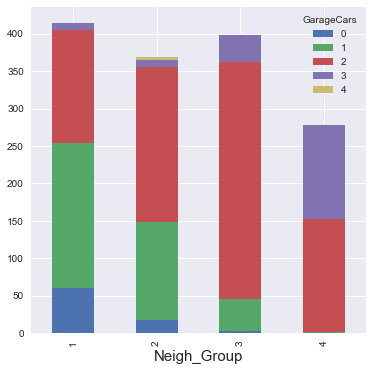

In [612]:
#What if we include GarageCars in the model? Does this improve it? First, let's see what it's correlation is 
#like with the other explanatory variables.

#GarageCars does seem to be correlated with the neighborhood groups.

cars_hood_table = pd.crosstab(index=train_sub["Neigh_Group"], 
                          columns=train_sub["GarageCars"])
cars_hood_table.plot(kind="bar", 
                 figsize=(6,6),
                 stacked=True)

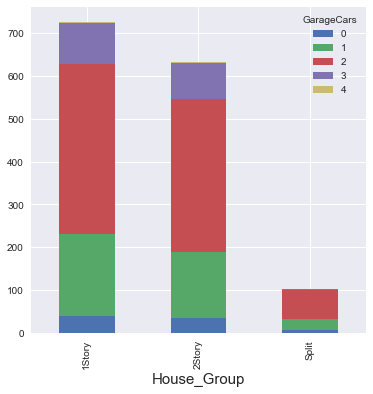

In [613]:
#Not so much with House_Group.
cars_house_table = pd.crosstab(index=train_sub["House_Group"], 
                          columns=train_sub["GarageCars"])
cars_house_table.plot(kind="bar", 
                 figsize=(6,6),
                 stacked=True)

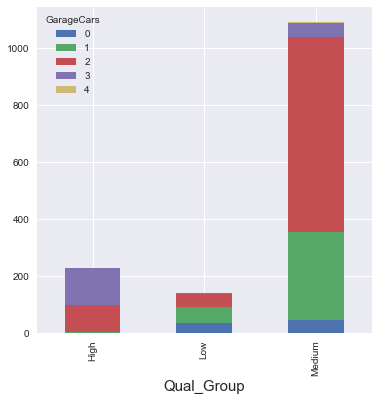

In [614]:
#High quality homes have more garages it seems on average
cars_quality_table = pd.crosstab(index=train_sub["Qual_Group"], 
                          columns=train_sub["GarageCars"])
cars_quality_table.plot(kind="bar", 
                 figsize=(6,6),
                 stacked=True)

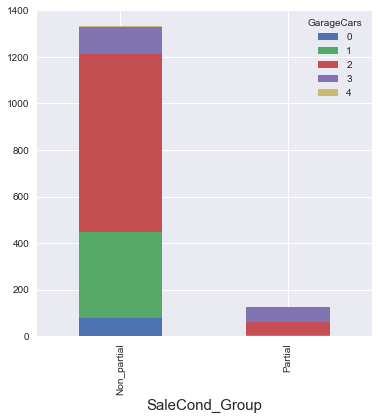

In [615]:
#Inconclusive relationship between GarageCars and SaleCond
cars_salecond_table = pd.crosstab(index=train_sub["SaleCond_Group"], 
                          columns=train_sub["GarageCars"])
cars_salecond_table.plot(kind="bar", 
                 figsize=(6,6),
                 stacked=True)

In [616]:
#Does substituting GarageCars for GrFlrArea reduce RMSE while not creating multicollinearity issues? First,
#let's dummify the variable
df = df.copy()
cars = pd.get_dummies(df['GarageCars'], prefix='Cars', prefix_sep='__')
cars = cars.drop('Cars__0', axis=1)
df = pd.concat([df, cars], axis=1)


In [617]:
#Split train_sub into train and test and fit 2nd linear model on train:

X = df[df.columns[-12:]]

try:  # train_test_split was moved in 0.18.0
    from sklearn.model_selection import train_test_split
except:  # Following import works through 0.19 but outputs a warning in 0.18
    from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

<p><a name="linear4"></a></p>

## Linear Regression 4

Linear regression using the following variables: "GarageCars", "Neighborhood", "OverallQual", 
"HouseStyle", "SaleCondition".

In [618]:
#4th Linear Regression. RMSE goes down from 3rd model.

ols = linear_model.LinearRegression()

ols.fit(X_train, y_train)

y_predicted_train = ols.predict(X_train)
mse_train = mean_squared_error(y_train, y_predicted_train)
rms_train = sqrt(mean_squared_error(y_train, y_predicted_train))

y_predicted_test = ols.predict(X_test)
mse_test = mean_squared_error(y_test, y_predicted_test)
rms_test = sqrt(mean_squared_error(y_test, y_predicted_test))

print("Root mean squared error for train set: %f" %rms_train)
print("R^2 for train set: %f" %ols.score(X_train, y_train))

print("*"*50)

print("Root mean squared error for test set: %f" %rms_test)
print("R^2 for test  set: %f" %ols.score(X_test, y_test))

colnames = X_train.columns
result = pd.DataFrame(ols.coef_)
result.columns = colnames.tolist()
result['intercept'] = ols.intercept_ 
result = result.transpose()
result.columns = ['coefficient']
result

Root mean squared error for train set: 0.216524
R^2 for train set: 0.712673
**************************************************
Root mean squared error for test set: 0.204887
R^2 for test  set: 0.704213


,coefficient
Neigh__2,0.155527
Neigh__3,0.269773
Neigh__4,0.332867
Style__2Story,0.078484
Style__Split,0.047306
Qual__High,0.563890
Qual__Medium,0.232406
saleCond__Partial,0.069752
Cars__1,0.139001
Cars__2,0.310510


In [619]:
#Checking VIFs. Amazing: all the VIFs are low except for Qual_High and Cars_3. But still below 5.
vif = [variance_inflation_factor(X.values, i) for 
       i in range(X.shape[1])]
print("VIF for all the variables:")
list(zip(vif, X.columns))

VIF for all the variables:


[(0.64688729083019769, 'Neigh__2'),
 (0.92020973762492697, 'Neigh__3'),
 (0.24491788321780528, 'Neigh__4'),
 (0.3625564761910271, 'Style__2Story'),
 (1.1578686507920701, 'Style__Split'),
 (3.9670673524779509, 'Qual__High'),
 (0.53643036798152199, 'Qual__Medium'),
 (1.3402751630642924, 'saleCond__Partial'),
 (0.93189245594883663, 'Cars__1'),
 (0.50256407771056766, 'Cars__2'),
 (3.3585388451606843, 'Cars__3'),
 (1.0292099707404789, 'Cars__4')]

In [620]:
#Performing same analysis as above using Statsmodel. AIC and BIC numbers improve relative to 3rd model and 
#multi-collinearity doesn't seem to be an issue. It appears that we can't reject null that coefficient for
#Style_Split is different from 0.

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     238.7
Date:                Tue, 07 Nov 2017   Prob (F-statistic):          1.65e-302
Time:                        07:35:41   Log-Likelihood:                 129.78
No. Observations:                1168   AIC:                            -233.6
Df Residuals:                    1155   BIC:                            -167.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                11.2681      0.02

<p><a name="linear5"></a></p>
## Linear Regression 5: Using all 20 Variables (excluding GrLivArea)

In [649]:
#read in csv file and create data frame
train_sub2 = pd.read_csv("train_sub.csv")

<p><a name="dummify1"></a></p>
### Dummify Variables

In [650]:
##dummify all non-numerica variables
X = pd.get_dummies(train_sub2.drop(["SalePrice"], axis = 1))

In [651]:
#drop one column for each of the dummy variables because it is completely determined by values in other columns
X = X.drop(["MSZoning_C (all)", "Neighborhood_Blmngtn", "HouseStyle_1.5Fin",
           "ExterQual_Ex","Foundation_BrkTil","BsmtQual_Ex", "GarageFinish_Fin", "GarageQual_Ex",
           "GarageCond_Ex","PavedDrive_None", "SaleType_COD", "SaleCondition_Abnorml"], axis = 1)

In [652]:
#dummify numerical variables that are actually categorical features: OverallQual, FullBath, GarageCars
X = X.copy()
X = pd.concat([X, df[df.columns[-4:]]], axis=1)
X.drop("GarageCars", axis = 1)

X = X.copy()
qual = pd.get_dummies(X['OverallQual'], prefix='Qual', prefix_sep='__')
qual = qual.drop('Qual__1', axis=1)
X = pd.concat([X.drop('OverallQual', axis=1), qual], axis=1)

X = X.copy()
bath = pd.get_dummies(X['FullBath'], prefix='Bath', prefix_sep='__')
bath = bath.drop('Bath__0', axis=1)
X = pd.concat([X.drop('FullBath', axis=1), bath], axis=1)

<p><a name="standardization"></a></p>
### Standardization
Standardize numeric variables by normalization.

In [653]:
#scaling numeric variables
a = X["YearBuilt"].astype(float)
b = X["X1stFlrSF"].astype(float)
c = X["X2ndFlrSF"].astype(float)
d = X["GrLivArea"].astype(float)
e = X["GarageArea"].astype(float)

yr_scaled = pd.DataFrame(preprocessing.scale(a))
x1_scaled = pd.DataFrame(preprocessing.scale(b))
x2_scaled = pd.DataFrame(preprocessing.scale(c))
gr_scaled = pd.DataFrame(preprocessing.scale(d))
garage_scaled = pd.DataFrame(preprocessing.scale(e))

X['YearBuilt'] = yr_scaled
X["X1stFlrSF"] = x1_scaled
X["X2ndFlrSF"] = x2_scaled
X["GrLivArea"] = gr_scaled
X["GarageArea"] = garage_scaled

<p><a name="VIF2"></a></p>
### Variance Inflation Factor
Calculate the VIF for all the variables using statsmodel.

In [654]:
#Checking VIFs. Many high VIFs
C = X.copy()
vif = [variance_inflation_factor(C.values, i) for i in range(C.shape[1])]

l = list(zip(vif, C.columns))
l = sorted(l, reverse = True)
l_names = [x[1] for x in l]
l


/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[(inf, 'GarageQual_None'),
 (inf, 'GarageFinish_None'),
 (inf, 'GarageCond_None'),
 (inf, 'GarageCars'),
 (inf, 'Cars__4'),
 (inf, 'Cars__3'),
 (inf, 'Cars__2'),
 (inf, 'Cars__1'),
 (228.47887334096131, 'GarageCond_TA'),
 (219.91027138175255, 'GrLivArea'),
 (202.43747015911023, 'Qual__5'),
 (195.99611908676431, 'Qual__6'),
 (180.65188378844564, 'GarageQual_TA'),
 (176.97531092940423, 'Qual__7'),
 (145.01923527139937, 'X2ndFlrSF'),
 (120.44015564769282, 'X1stFlrSF'),
 (107.51382280929978, 'Qual__8'),
 (73.506838974324495, 'Qual__4'),
 (65.752128401627772, 'GarageCond_Fa'),
 (63.956608507003722, 'GarageQual_Fa'),
 (53.048837857174277, 'Bath__2'),
 (51.792115477994813, 'Bath__1'),
 (45.192626927973564, 'SaleType_New'),
 (42.839452456148265, 'SaleCondition_Partial'),
 (41.655415769163916, 'MSZoning_RL'),
 (31.863486411309548, 'Qual__9'),
 (28.594272649118775, 'MSZoning_RM'),
 (19.886575682108482, 'GarageQual_Gd'),
 (18.306650554174386, 'GarageCond_Gd'),
 (17.08472460433099, 'ExterQual_TA')

In [655]:
for i in range(10):
    C = C.drop(l_names[i], axis = 1)
    i = i +1

In [656]:

vif = [variance_inflation_factor(C.values, i) for i in range(C.shape[1])]

l = list(zip(vif, C.columns))
l = sorted(l, reverse = True)
l_names = [x[1] for x in l]
l


[(164.6852705621001, 'MSZoning_RL'),
 (139.27412516943701, 'Qual__5'),
 (130.36008730933827, 'Qual__6'),
 (111.25132312339076, 'Qual__7'),
 (110.01047518003364, 'Bath__2'),
 (91.949316610241027, 'Bath__1'),
 (67.229259928809299, 'TotRmsAbvGrd'),
 (59.928514805799161, 'Qual__8'),
 (49.110433438663193, 'SaleType_New'),
 (46.660570027981763, 'SaleCondition_Partial'),
 (42.759101364461472, 'ExterQual_TA'),
 (39.674015735774411, 'Qual__4'),
 (38.426929546273655, 'GarageQual_TA'),
 (36.695872944701655, 'SaleType_WD'),
 (28.991405316974447, 'MSZoning_RM'),
 (24.556201925253795, 'PavedDrive_Y'),
 (19.747051424738654, 'ExterQual_Gd'),
 (18.541153381471045, 'BsmtQual_TA'),
 (17.573098692476357, 'Neighborhood_NAmes'),
 (16.229497701231793, 'SaleCondition_Normal'),
 (15.800320247494048, 'Qual__9'),
 (15.504082108831108, 'HouseStyle_1Story'),
 (13.789757377710965, 'MSZoning_FV'),
 (12.794129038209126, 'Foundation_PConc'),
 (12.430477479006436, 'Neighborhood_OldTown'),
 (12.108538128268934, 'BsmtQua

In [657]:
for i in range(27):
    C = C.drop(l_names[i], axis = 1)
    i = i +1

In [658]:
vif = [variance_inflation_factor(C.values, i) for i in range(C.shape[1])]

l = list(zip(vif, C.columns))
l = sorted(l, reverse = True)
l_names = [x[1] for x in l]
l


[(4.2783783185211899, 'YearBuilt'),
 (3.0379922504172745, 'BsmtQual_None'),
 (3.0243717161202448, 'Foundation_Slab'),
 (3.0002311778111825, 'GarageFinish_Unf'),
 (2.5565318675154258, 'Foundation_CBlock'),
 (2.3484989457156908, 'HouseStyle_2Story'),
 (2.1250823772468306, 'GarageCond_Po'),
 (2.1082901974199371, 'X1stFlrSF'),
 (2.0347119192806398, 'GarageArea'),
 (2.0139939963667866, 'GarageQual_Po'),
 (1.9970635488950652, 'GarageFinish_RFn'),
 (1.8381270563293615, 'Neighborhood_CollgCr'),
 (1.6635144874580936, 'Neighborhood_Somerst'),
 (1.6520083140322761, 'GarageQual_Fa'),
 (1.5890669616205355, 'Neighborhood_NridgHt'),
 (1.5028012750827096, 'Neighborhood_Gilbert'),
 (1.477610548364896, 'GarageCond_Fa'),
 (1.3481318537256397, 'Neighborhood_NoRidge'),
 (1.3448040181362417, 'Neighborhood_SawyerW'),
 (1.3251933824971827, 'Neighborhood_NWAmes'),
 (1.3065323855425244, 'Neighborhood_SWISU'),
 (1.2666299757158603, 'Neighborhood_Edwards'),
 (1.2624658341880373, 'Neighborhood_BrkSide'),
 (1.25072

In [659]:
#Set X equal to the reduced data frame
X = C


<p><a name="linear_5"></a></p>
### Linear Regression
Fit model with the reduced set of 61 variables

In [660]:
# Create training and test sets

try:  # train_test_split was moved in 0.18.0
    from sklearn.model_selection import train_test_split
except:  # Following import works through 0.19 but outputs a warning in 0.18
    from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [661]:
#Regression results better than previous ones. However, R^2 decreases between training set and test set.

ols = linear_model.LinearRegression()

ols.fit(X_train, y_train)

y_predicted_train = ols.predict(X_train)
mse_train = mean_squared_error(y_train, y_predicted_train)
rms_train = sqrt(mean_squared_error(y_train, y_predicted_train))

y_predicted_test = ols.predict(X_test)
mse_test = mean_squared_error(y_test, y_predicted_test)
rms_test = sqrt(mean_squared_error(y_test, y_predicted_test))

print("Root mean squared error for train set: %f" %rms_train)
print("R^2 for train set: %f" %ols.score(X_train, y_train))

print("*"*50)

print("Root mean squared error for test set: %f" %rms_test)
print("R^2 for test  set: %f" %ols.score(X_test, y_test))

colnames = X_train.columns
result = pd.DataFrame(ols.coef_)
result.columns = colnames.tolist()
result['intercept'] = ols.intercept_ 
result = result.transpose()
result.columns = ['coefficient']
result

Root mean squared error for train set: 0.173840
R^2 for train set: 0.814790
**************************************************
Root mean squared error for test set: 0.177430
R^2 for test  set: 0.778180


,coefficient
YearBuilt,0.069010
X1stFlrSF,0.139850
GarageArea,0.073716
MSZoning_RH,-0.065913
Neighborhood_Blueste,-0.060584
Neighborhood_BrDale,-0.251558
Neighborhood_BrkSide,0.038585
Neighborhood_ClearCr,0.237570
Neighborhood_CollgCr,0.067129
Neighborhood_Crawfor,0.249110


In [662]:
#Performing same analysis as above using Statsmodel. AIC and BIC numbers improve relative to other models and 
#multi-collinearity doesn't seem to be an issue. It appears that we can't reject null that coefficients are zero
#for quite a few variables. 

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     79.76
Date:                Tue, 07 Nov 2017   Prob (F-statistic):               0.00
Time:                        07:42:06   Log-Likelihood:                 386.24
No. Observations:                1168   AIC:                            -648.5
Df Residuals:                    1106   BIC:                            -334.6
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.97

In [663]:
# fit model to entire dataset

ols = linear_model.LinearRegression()

ols.fit(X, y)

y_predicted = ols.predict(X)
mse = mean_squared_error(y, y_predicted)
rms = sqrt(mean_squared_error(y, y_predicted))


print("Root mean squared error for entire dataset: %f" %rms)
print("R^2 for entire dataset: %f" %ols.score(X, y))



colnames = X.columns
result = pd.DataFrame(ols.coef_)
result.columns = colnames.tolist()
result['intercept'] = ols.intercept_ 
result = result.transpose()
result.columns = ['coefficient']
result


Root mean squared error for entire dataset: 0.173156
R^2 for entire dataset: 0.811961


,coefficient
YearBuilt,0.070514
X1stFlrSF,0.139153
GarageArea,0.072869
MSZoning_RH,-0.095810
Neighborhood_Blueste,-0.128206
Neighborhood_BrDale,-0.243838
Neighborhood_BrkSide,0.049107
Neighborhood_ClearCr,0.225485
Neighborhood_CollgCr,0.075371
Neighborhood_Crawfor,0.286683


In [664]:
#Doing the same in Statsmodel
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     98.96
Date:                Tue, 07 Nov 2017   Prob (F-statistic):               0.00
Time:                        07:42:06   Log-Likelihood:                 488.55
No. Observations:                1460   AIC:                            -853.1
Df Residuals:                    1398   BIC:                            -525.4
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    11.96

<p><a name="residuals_lin5"></a></p>
### Residuals Analysis
Examine the residuals of the final model fitted in the previous linear regression.





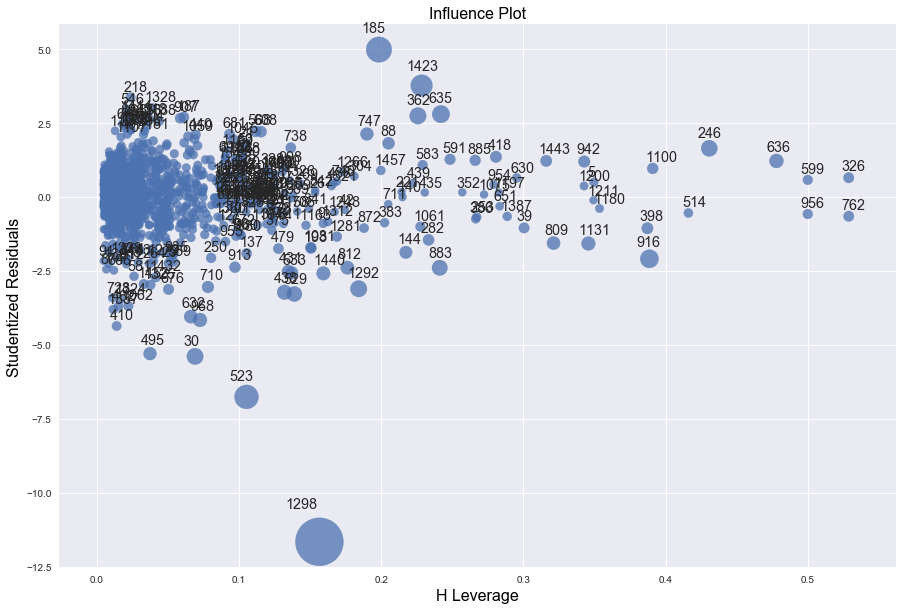

In [665]:
# Examine leverage. Hard to see, but seems like quite a few observations have big influence:
#1298, 185, 1423. Also high leverage on the far right.
fig, ax = plt.subplots(figsize=(15,10))
fig = sm.graphics.influence_plot(results, ax=ax, criterion="cooks")

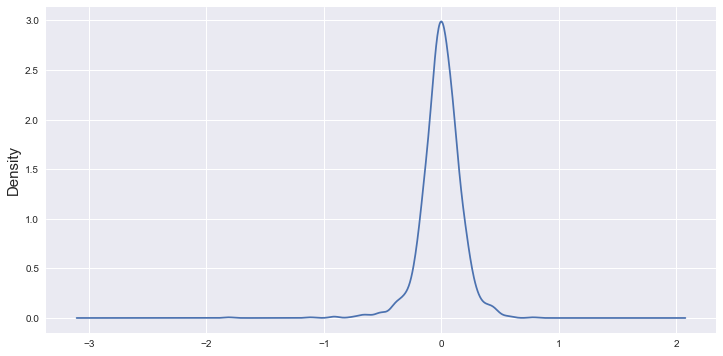

In [666]:
#check for normality. Looks normal.
plt.figure()

results.resid.plot.density()
plt.show()

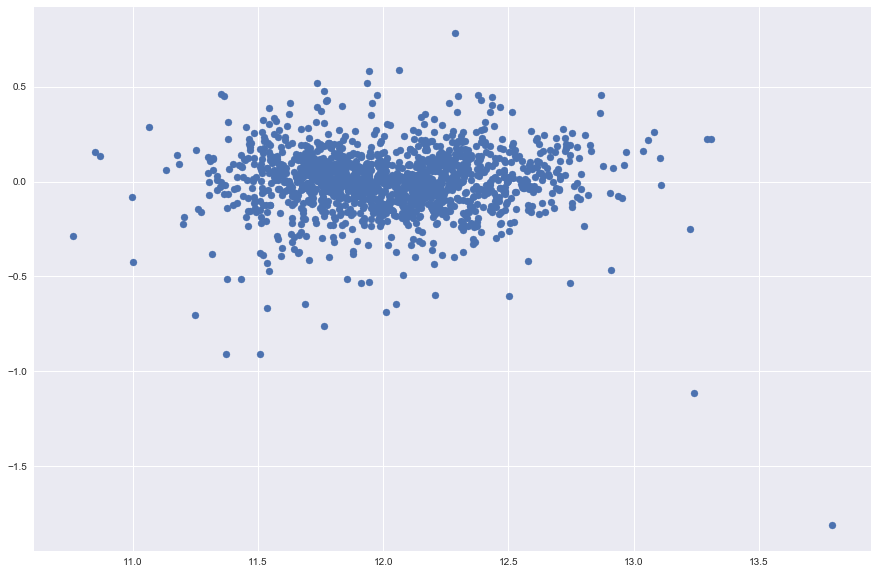

In [667]:
#Plot residuals against fitted values. Some outliers but don't detect any patterns.
fig, ax = plt.subplots(figsize=(15,10))
fig = plt.scatter(results.fittedvalues, results.resid)

<p><a name="Ridge_Lasso"></a></p>
## Ridge-Lasso Analysis
The analyses performed are in the following order: Ridge, Lasso, and Combination

<p><a name="Ridge"></a></p>
### Ridge Analysis


In [693]:
# Create training and test sets

try:  # train_test_split was moved in 0.18.0
    from sklearn.model_selection import train_test_split
except:  # Following import works through 0.19 but outputs a warning in 0.18
    from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [694]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [695]:
model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

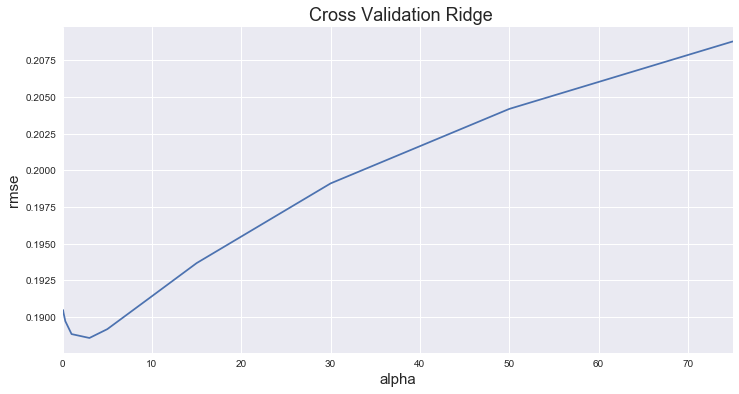

In [696]:
mpl.rcParams['figure.figsize'] = (12.0, 6.0)
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = " Cross Validation Ridge")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [671]:
#Best alpha is 3
print(cv_ridge)
print(cv_ridge.min())

0.05     0.190470
0.10     0.190277
0.30     0.189712
1.00     0.188831
3.00     0.188565
5.00     0.189167
10.00    0.191414
15.00    0.193670
30.00    0.199105
50.00    0.204183
75.00    0.208780
dtype: float64
0.188564806921


In [697]:
#Fitting to entire training subset
Ridge_best = Ridge(alpha = 3)
Ridge_best.fit(X_train, y_train)
print("Ridge training R-squared is: %f" %Ridge_best.score(X_train, y_train))

y_predicted_train = Ridge_best.predict(X_train)
mse_train = mean_squared_error(y_train, y_predicted_train)
rms_train = sqrt(mean_squared_error(y_train, y_predicted_train))
print("Ridge training RMSE is: %f" %rms_train)

Ridge training R-squared is: 0.810023
Ridge training RMSE is: 0.176063


In [701]:
#Test model against test set. R^2 and RMSE worsened.

y_predicted_test = Ridge_best.predict(X_test)
mse_test = mean_squared_error(y_test, y_predicted_test)
rms_test = sqrt(mean_squared_error(y_test, y_predicted_test))
print("Ridge test R-squared is: %f" %Ridge_best.score(X_test, y_test))
print("Ridge test RMSE is: %f" %rms_test)

Ridge test R-squared is: 0.778141
Ridge test RMSE is: 0.177445


In [702]:
#Fitting to entire training set
Ridge_final = Ridge(alpha = 3)
Ridge_final.fit(X, y)
print("Ridge R-squared on entire training set is: %f" %Ridge_best.score(X, y))

y_predicted = Ridge_final.predict(X)
mse = mean_squared_error(y, y_predicted)
rms = sqrt(mean_squared_error(y, y_predicted))
print("Ridg RMSE is: %f" %rms)

Ridge R-squared on entire training set is: 0.804981
Ridg RMSE is: 0.174756


In [707]:
(Ridge_final.coef_)

array([[ 0.        ,  0.07427681,  0.1436634 ,  0.07633162, -0.07187417,
        -0.05347328, -0.20512872,  0.03168192,  0.19026958,  0.04807438,
         0.25845502, -0.08799467,  0.05740838, -0.13416937, -0.2706199 ,
        -0.03493801, -0.03558199,  0.03454894,  0.23548665,  0.22251733,
         0.06237437, -0.03309257,  0.03905898,  0.08976745,  0.24005622,
         0.12822727,  0.18103664, -0.04522156,  0.20171284,  0.1678273 ,
         0.19378387,  0.02521828,  0.03585679, -0.20031179, -0.04008169,
        -0.06424109,  0.03726644, -0.00155442, -0.07551612, -0.19850236,
        -0.03261819, -0.06375953, -0.01462511,  0.08038807, -0.08421718,
        -0.07238243,  0.0188671 , -0.06356293,  0.00622354,  0.08929783,
         0.06810342,  0.02505662, -0.00885736,  0.01364763, -0.04647276,
         0.00802683, -0.09060413, -0.09330116, -0.30193114, -0.18587936,
         0.03635519,  0.18093899]])

<p><a name="Lasso"></a></p>
### Lasso Analysis


In [673]:
# LassoCV
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)

/Users/wingyansang/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
